# Chapter 3: Logistic Regression

In [11]:
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns#; sns.set()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## 3.1 Introduction & Motivation

Unfortunately, classic regression models don't quite work when we're handling categorical data. For this type of data, we need a different type of models called classifiers.

Categorical Data is defined as a dataset wherein the dependent variable is of a categorical nature. This means, quite logically, that the dependent variable which we try to understand or predict is not simply continuous. A straightforward example is trying to predict whether a student is male or female based on his/her exam marks. (Let's hope that no clear conclusion is to be drawn in that particular setting.) In that case, our dependent variable can only take two values: male and female. Or more formally, our variable is binary: 1 or 0, true or false. As such, this setting is called a binary classification setting. There are obviously also setting with more than 2 categories, like we will see above.

The important part here however, is to realize that a simple regression model will not work for these type of analyses. If gender (0,1) is our dependent variable, and we were to fit a regression model, there will almost certainly be input values which will predict our outcome to be 0,5. How would we need to interpret this? What about when we predict 2 or -10? These are all possible predictions a regression model might make.

As such, we need dedicated models to handle categorical data. The first classifier we will see is the Logistic Regression Model. This is a regression model which we restrict from certain prediction values. In other words; we tell the regression model beforehand which the possible values are, and then form the best fitting function to these.

## 3.2 Problem Setting

In our example problem, we will work with the digits dataset. This is one of the build-in datasets that comes with $sklearn$. It contains pictures of handwritten digits, along with the digit it is supposed to present. In this case,, the number being represented is the dependent variable. This might sound counterintuitive, but it is exactly this property that we are trying to predict. The independent variable is the picture of the handwritten digit. It is this data that we will use to predict which number is being represented. More concretely, since all images have the same amount of pixels with the same coordinates, these are the variables. The value of each of these variables is the tint with which it is filled in.

Let's start off by importing the data and taking a look at it!

In [12]:
digits = datasets.load_digits()
dir(digits)
# data
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


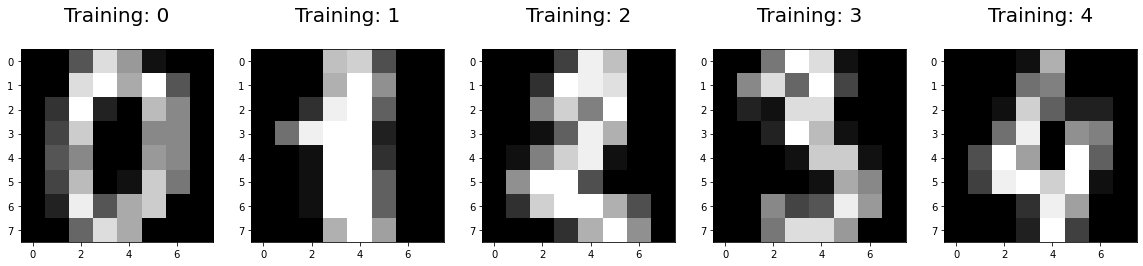

In [13]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## 3.3 Model

### 3.3.1 Model

Let's take a short look at what the Logistic Regression Model actually does.

If we remember the Linear Regression model, we'll remember that it was all build around the linear function: a straight line which just goes on and on. And we fit this line as best as we can within our data. The Logistic Regression Model adapts this function (just like the Polynomial Regression Model does) to a different category of functions. One example of those is the sig function:


![](https://miro.medium.com/max/1400/1*RqXFpiNGwdiKBWyLJc_E7g.png)

As was the case with our Linear Regression model, the vertical axis represents the dependent variable and the horizontal axis represents the independent variable. As we can see clearly, the sig function doesn't run through to infinity. The maximum value of this function is 1, and the minimum value is 0. This is absolutely perfect to do binary classification.
The question now obviously, is how to interpret this. It is clear that all values for t higher than 8 will predict the value 1, and all values under -8 will predict 0. But what for all values between these two? For example; what does the prediction under $t=2$ or $t=0$ mean? When we look at the $sig(t)$ value for $t=0$, we find $0.5$. This value should be interpreted as the probability that the outcome will be 1. Likewise, the prediction for $t=-2$ is that 0 will be achieved with $0.1$ probability and 1 with a $0.9$ probability.

The sig function is a good example that we can use for binary classifications. Other functions exist to do this when we have more categories to classify in.

### 3.3.2 Model Estimation

To start off, we'll again divide our dataset into a test and a trainingset. This will allow us to evaluate the accuracy of our model later on:

In [14]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

Next, we'll fit our model on the data.

The first step is just making the model. This is done with several options. These refer to exactly which function we use to fit the data to, and which algorithm we use to fit our data to the chosen function. These options will be further elaborated on in the exercises.

In [15]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

Now we've made our classifier, we'll test if the predictions are any good by predicting the values of the test set.

In [16]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])
predictions = logisticRegr.predict(x_test)


As can be seen, we have made a NumPy Array in which the predictions are stored. This however doesn't really tell us anything about whether our predictions are correct. To check this, we'll move over to model evaluation.

## 3.4 Model Evaluation

There are different metrics which we can use for model evaluation.
The model evaluation has one clear goal: determining whether our model is any good. How exactly to measure this is rather difficult. In essence, if we make a prediction, we would like it to be correct, all of the time. A good question is how to quantify this.
Luckily, we've saved our test set to calculate some stuff!

### Accuracy

Accuracy is the first metric we'll take a look at. Accuracy determines how often our classified is correct. We'll make predictions for our test set, and then compare these to the actual values. The $score$ is the measure of accuracy we'll make use of: 

$$Score = \frac{\# \text{ correct predictions}}{\# \text{ total observations}}$$

In [17]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


##### Question 1: The code above will help us to calculate the score. Try to interpret the value we have gotten. Is our model any good?

##### Yes we get a score of 0.95 this tells us that we can trust our out come and know that our module good is.

### Precision

The second metric we'll use is the precision. The precision tries to tell us something about the consistency of our classified. The question we try to answer is the following: we know how close our classifier is (on average) to the true value, but how large is the variance on the correctness of this prediction? In other words; regardless if my prediction is right or wrong, will it always be the same when a comparable input is given?

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



##### Question 2: does the precision of our model diminish its accuracy value or not? Explain based on the results we've become.

##### We see that most of our data is above 0.90 this means that this is a 90% chance of correctness

### Confusion Matrix

Next to the accuracy and prediction, it might sometimes be interesting to provide graphical, more intuitive metrics. A first example of this is the confusion matrix. The confusion matrix shows for each label in the true data, each prediction that is made. We hope to see a diagonal here with very high values, and hope so see as much zeroes as possible everywhere else. As this would mean all predictions be correct.

In [19]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


Though perfectly readable, this is not the type of "intuitive graphical representation" you might want to present to illustrate your conclusions. Luckily, this is very handy to mark-up:

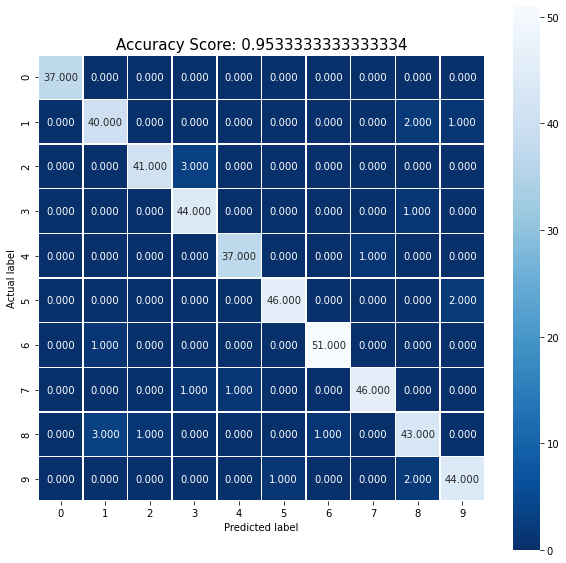

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##### Question 3: for which metric we discussed above, is the Confusion Matrix a graphical representation? Why?

##### What I think you see the acctually result and what the predicited result is. So you can see how accurate the predicted result is. 

### Additional Illustrations

Additional illustrations do exist (such as the ROC), but these are not always interesting nor possible for multiclass analysis. It might however be interesting to think about one illustration that will convince your audience you do know what you're talking about. For this, make question 4.

##### Question 4: Go back and take a look at section 3.2, and the illustration we provided there. Try and adapt the code to represent 10 data points, and also include the predicted value.

## 3.5 Questions

##### Question 1: See section 3.4
##### Yes we get a score of 0.95 this tells us that we can trust our out come and know that our module good is.
##### Question 2: See section 3.4
##### We see that most of our data is above 0.90 this means that this is a 90% chance of correctness
##### Question 3: See section 3.4
##### What I think you see the acctually result and what the predicited result is. So you can see how accurate the predicted result is. 
##### Question 4: See section 3.4


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

# Question 5: 
Go back to section 3.3.2 and remember that we could include different options into our model. In this question we take a look at the "solvers", and their efficiency. A solver is an algorithm that is used to estimate and thus fit our desired functions. The option max_iter gives a maximum to how many iterations the algorithm may make (think: loops). Compare the precision and accuracy for the logistic regression model using different algorithms (lbfgs, saga, newton-cg) and different levels of max_iteration. Report on which algorithm achieves a desired level of accuracy and precision in the most efficient way (the least number of iterations).